In [59]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)  #adjust the configuration of the plot we will create



In [60]:
#read the data
os.chdir("C:/Users/harsh/Downloads")
df=pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [61]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [62]:
#checking for missing data
df2=df.copy()
df2.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [63]:
#another method of checking for missing values
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [64]:
df2.describe()

#if there is not much difference between mean and median(50%) then mean value can be used or else median value is used

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [65]:
# filling the missing values of numerical data
#substituting the nan values with the mean value for small differences

df2['score'].fillna(df2['score'].mean(),inplace=True)


In [66]:
#checking  if above steps affected the data or not

df2.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          0
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [67]:
df2['runtime'].fillna(df2['runtime'].mean(),inplace=True)


In [68]:
# filling the missing values of numerical data
#substituting the nan values with the median value for large differences

df2['votes'].fillna(df2['votes'].median(),inplace=True)


In [69]:
df2['budget'].fillna(df2['budget'].median(),inplace=True)

In [70]:
df2['gross'].fillna(df2['gross'].median(),inplace=True)

In [71]:
df2.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [72]:
#dropping the columns where categorical data is missing 
df2 = df2.dropna()


In [73]:
df2.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
#checking data types of our columns
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [74]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [75]:
#changing data types of  votes and gross
df2['votes']=df2['votes'].astype('int64')
df2['gross']=df2['gross'].astype('int64')
df2['runtime']=df2['runtime'].astype('int64')
df2['budget']=df2['budget'].astype('int64')

In [76]:
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [77]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [78]:
#the released and the year column are supposed to have same year but there are some mismatches
#create a new column which has the year from the released column

df2['correct_year']=df2['released'].str.extract(pat='([0-9]{4})').astype(int)


#df['released'] selects the "released" column of the DataFrame.
#str.extract(pat = '([0-9]{4})') method extracts a four-digit number from the "released" column using a regular expression pattern. The pattern [0-9]{4} matches any sequence of four consecutive digits in the string.

#The extracted four-digit numbers are then converted to integers using the astype(int) method.

#The resulting integers are assigned to the new "yearcorrect" column of the DataFrame.
#In summary, this code extracts the four-digit year from the "released" column of the DataFrame using a regular expression pattern and creates a new column "yearcorrect" containing these extracted values as integers.





In [79]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [83]:
#order the data by gross revenue
df2=df2.sort_values(by=['gross'],inplace=False,ascending=False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [84]:
#to view all the data
pd.set_option('display.max_rows',None)


#This code sets the display option for pandas to show all rows of a DataFrame, rather than truncating the output after a certain number of rows.
#None is the value to which the option is being set. By setting this value to None, pandas will display all rows of the DataFrame.

In [86]:
df2=df2.sort_values(by=['gross'],inplace=False,ascending=False)
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [91]:
#check for duplicates if any drop them
df2['company'].sort_values(ascending=False).head()

#shows all the data and duplicates values can be found


7129    2339
5664    2338
6412    2337
4007    2336
6793    2335
Name: company, dtype: int16

In [90]:
df2['company'].drop_duplicates().sort_values(ascending=False).head()
#shows the distinct values but does not drop duplicates values

7129    2339
5664    2338
6412    2337
4007    2336
6793    2335
Name: company, dtype: int16

In [29]:
#to drop the duplicates use

#df2.drop_duplicates()   #drops duplicates in the table

In [30]:
#df2.dtypes

In [31]:
#numerical_data=df2.select_dtypes(exclude=[object])

In [32]:
#corr_matrix=numerical_data.corr()
#print(corr_matrix)

Text(0, 0.5, 'Gross Earnings')

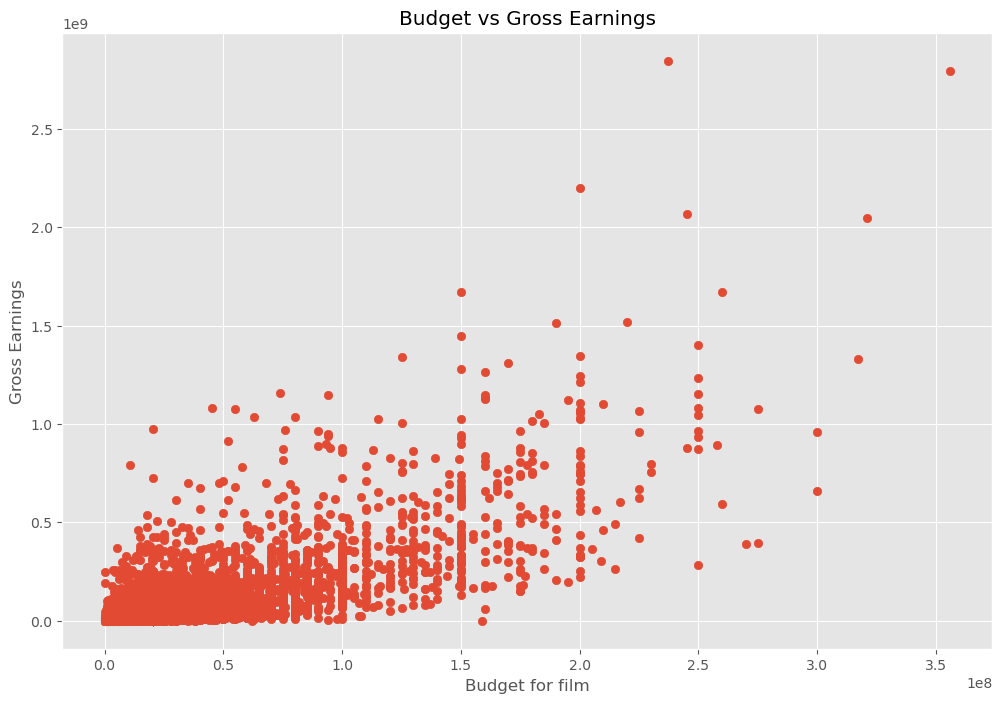

In [33]:
#scatter plot with budget vs gross
plt.scatter(df2['budget'],df2['gross'])
#plt.scatter(x=df2['budget'],y=df2['gross'])
plt.title('Budget vs Gross Earnings' )

plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')

<AxesSubplot:xlabel='budget', ylabel='gross'>

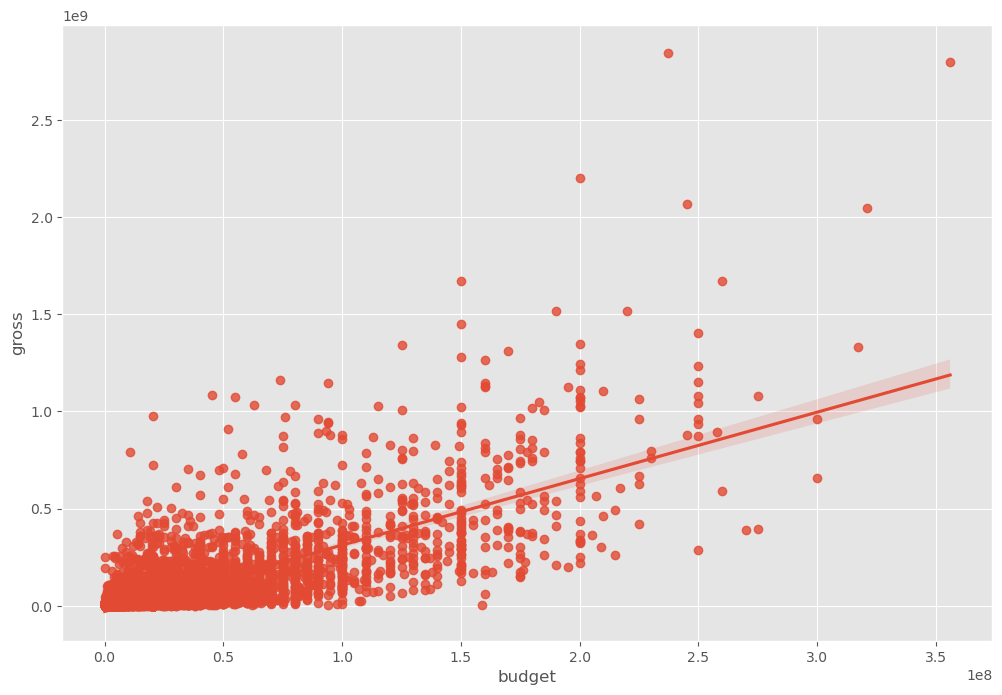

In [34]:
#seaborn plot
sns.regplot(x=df2['budget'],y=df2['gross'] )


<AxesSubplot:xlabel='budget', ylabel='gross'>

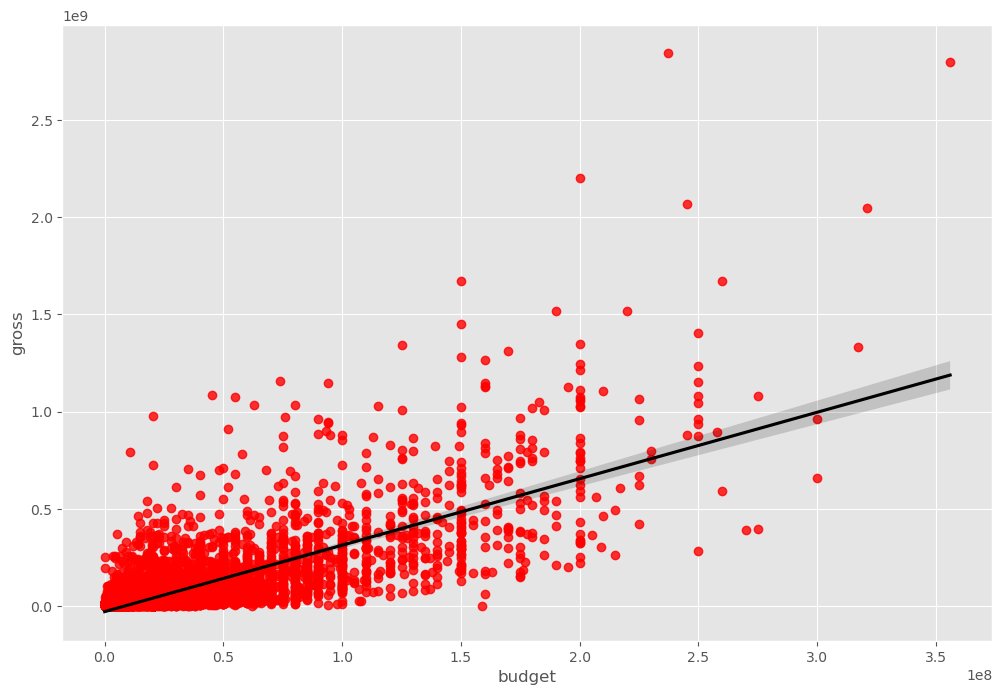

In [35]:
sns.regplot(x=df2['budget'],y=df2['gross'] ,scatter_kws={'color':'red'},line_kws={'color':'black'})


In [41]:
#checking the correlation
df2.corr()   #pearson correlation(default),kendall,spearman

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.102154,0.226709,0.295868,0.261960,0.120808,0.997468
score,0.102154,1.000000,0.411934,0.062491,0.187541,0.400529,0.109625
votes,0.226709,0.411934,1.000000,0.460066,0.632341,0.309318,0.222135
budget,0.295868,0.062491,0.460066,1.000000,0.746358,0.273795,0.288179
gross,0.261960,0.187541,0.632341,0.746358,1.000000,0.244156,0.255043
runtime,0.120808,0.400529,0.309318,0.273795,0.244156,1.000000,0.120500
correct_year,0.997468,0.109625,0.222135,0.288179,0.255043,0.120500,1.000000


In [37]:
df2.corr(method='pearson')

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.102154,0.226709,0.295868,0.261960,0.120808,0.997468
score,0.102154,1.000000,0.411934,0.062491,0.187541,0.400529,0.109625
votes,0.226709,0.411934,1.000000,0.460066,0.632341,0.309318,0.222135
budget,0.295868,0.062491,0.460066,1.000000,0.746358,0.273795,0.288179
gross,0.261960,0.187541,0.632341,0.746358,1.000000,0.244156,0.255043
runtime,0.120808,0.400529,0.309318,0.273795,0.244156,1.000000,0.120500
correct_year,0.997468,0.109625,0.222135,0.288179,0.255043,0.120500,1.000000


In [38]:
#df2.corr(method='kendall')

In [39]:
#df2.corr(method='spearman')

Text(120.72222222222221, 0.5, 'Movie Features')

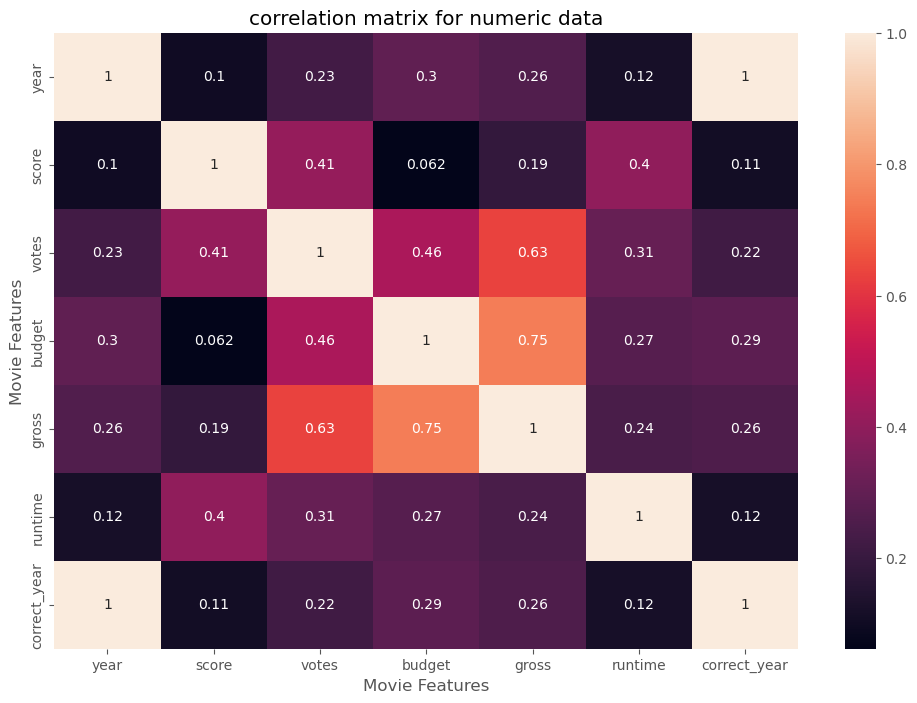

In [40]:
#high correlation  betweem budget and gross

#visualizing correlation matrix
corr_matrix=df2.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('correlation matrix for numeric data' )

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [87]:
#creating numeric representation of the column with object data type
#so that it can be included in the correalation

for col_name in df2.columns:
    if(df2[col_name].dtype=='object'):
        df2[col_name]=df2[col_name].astype('category')
        df2[col_name]=df2[col_name].cat.codes
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,527,5,0,2009,688,7.8,1100000,1137,1757,2284,55,237000000,2847246203,2209,162,2009
7445,529,5,0,2019,180,8.4,903000,160,730,2193,55,356000000,2797501328,1572,181,2019
3045,6813,5,6,1997,696,7.8,1100000,1137,1757,1560,55,200000000,2201647264,2209,194,1997
6663,5077,5,0,2015,690,7.8,876000,1107,2519,508,55,245000000,2069521700,1506,138,2015
7244,530,5,0,2018,189,8.4,897000,160,730,2193,55,321000000,2048359754,1572,149,2018


Text(120.72222222222221, 0.5, 'Movie Features')

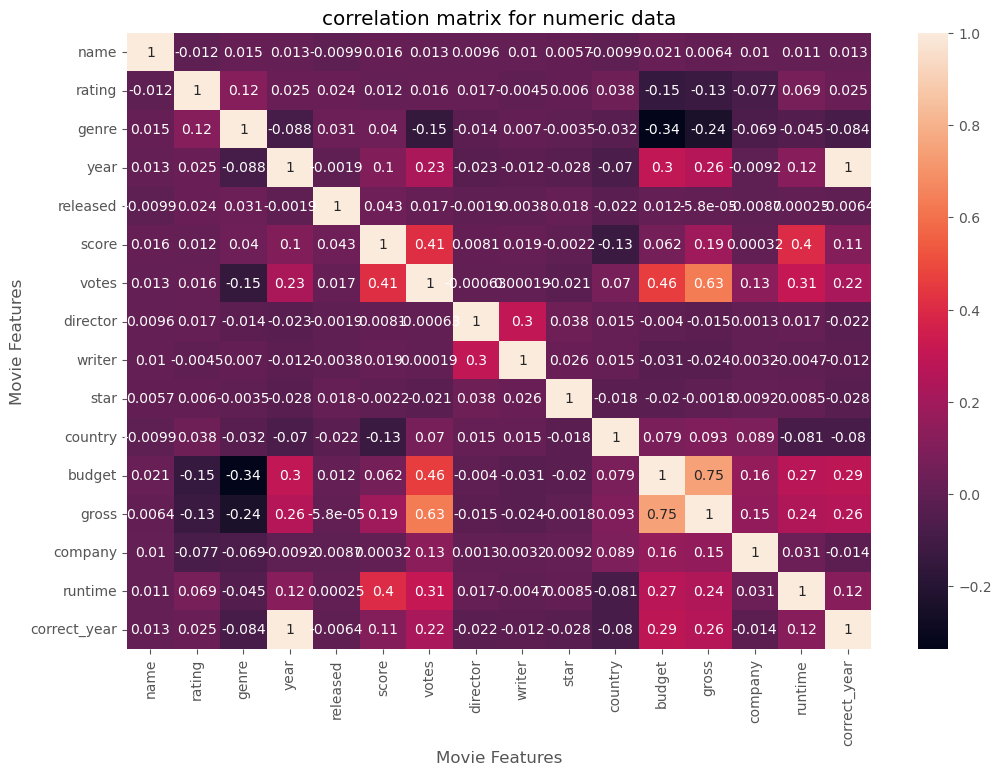

In [45]:
corr_matrix=df2.corr(method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('correlation matrix for numeric data' )

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [46]:
df2.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.011944,0.015250,0.013483,-0.009936,0.016160,0.013182,0.009605,0.010271,0.005666,-0.009942,0.021380,0.006376,0.010085,0.011130,0.012680
rating,-0.011944,1.000000,0.117657,0.025120,0.024450,0.011562,0.016061,0.017211,-0.004538,0.005972,0.037765,-0.146433,-0.129114,-0.076860,0.069153,0.025343
genre,0.015250,0.117657,1.000000,-0.088103,0.030843,0.040281,-0.148381,-0.013502,0.006956,-0.003450,-0.031503,-0.335563,-0.240304,-0.068755,-0.044528,-0.084491
year,0.013483,0.025120,-0.088103,1.000000,-0.001890,0.102154,0.226709,-0.022740,-0.012450,-0.027507,-0.070084,0.295868,0.261960,-0.009181,0.120808,0.997468
released,-0.009936,0.024450,0.030843,-0.001890,1.000000,0.043226,0.016821,-0.001867,-0.003831,0.018129,-0.022073,0.011931,-0.000058,-0.008693,0.000250,-0.006385
score,0.016160,0.011562,0.040281,0.102154,0.043226,1.000000,0.411934,0.008074,0.018887,-0.002196,-0.130144,0.062491,0.187541,0.000325,0.400529,0.109625
votes,0.013182,0.016061,-0.148381,0.226709,0.016821,0.411934,1.000000,-0.000629,0.000191,-0.021007,0.069544,0.460066,0.632341,0.129612,0.309318,0.222135
director,0.009605,0.017211,-0.013502,-0.022740,-0.001867,0.008074,-0.000629,1.000000,0.297418,0.037564,0.015242,-0.003975,-0.014800,0.001328,0.017403,-0.022072
writer,0.010271,-0.004538,0.006956,-0.012450,-0.003831,0.018887,0.000191,0.297418,1.000000,0.026462,0.014936,-0.031215,-0.023779,0.003174,-0.004659,-0.012145
star,0.005666,0.005972,-0.003450,-0.027507,0.018129,-0.002196,-0.021007,0.037564,0.026462,1.000000,-0.017577,-0.019799,-0.001765,0.009243,0.008550,-0.027922


In [88]:
#unstacking 
corr_mat=df2.corr()
corr_pairs=corr_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.011944
      genre       0.015250
      year        0.013483
      released   -0.009936
dtype: float64

In [89]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.335563
budget  genre    -0.335563
genre   gross    -0.240304
gross   genre    -0.240304
votes   genre    -0.148381
dtype: float64

In [53]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.632341
votes         gross           0.632341
gross         budget          0.746358
budget        gross           0.746358
correct_year  year            0.997468
year          correct_year    0.997468
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64